<a href="https://colab.research.google.com/github/EdsonGiannini/Global-Video-Game-Sales-and-Reviews/blob/main/MVP_1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

Nome: Edson Giannini Ferreira 2


Matrícula: 4052025000128

Dataset: [Global Video Game Sales and Reviews] (https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-and-reviews)

O conjunto de dados Global Video Game Sales and Reviews é um conjunto de dados multivariado do ano de 2012 dos jogos de vídeo game mais vendidos da história até então. O objetivo principal é classificar cada jogo pelo nome da editora, genero do jogo, a plataforma onde foi lançado, o número de vendas em cada região, nota dada pela critica, número de total de vendas e ranking nesse número total.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Qual seria o gênero de jogo mais jogado?

- Muito se é debatido sobre o melhor ano na história do vídeo game, neste em duelo dois anos se sobressaem discursão 1997 e 1998. Seria mesmo um desses anos?

- Quando a empresa dona do vídeo game produz o jogo ele tende a ser melhor que a média?


## Tipo de Problema

Este é um problema de classificação supervisionada. Dado um conjunto de características (número total de vendas e nota recebida pela crítica), o objetivo é descobrir o genero de jogo mais popular, a correlação de qualidade com empresa priprietária da plataforma e descobrir o ano com os melhores lançamentos.

## Seleção de Dados

O dataset Global Video Game Sales and Reviews encontrado no repositório kaggle e foi escolhido para este MVP pois alem de ser uma temática de meu interesse ele apresentava fatores interresantes para lidar-se em um trabalho. Esses fatores são:

*   Dados faltantes
*   Números não normalizados



## Atributos do Dataset

O dataset Global Video Game Sales and Reviews contém 1960 jogos. Possuindo 12 atributos:

*   Rank: posição no ranking de mais vendidos
*   Game Title: nome do jogo.
*   Platform: plataforma onde foi lançado o jogo
*   Year: ano de lançamento
*   Genre: genero.
*   Publisher: nome da editora
*   North America: número em milhões vendas na américa do norte
*   Europe:número em milhões vendas na europa
*   Japan: número em milhões vendas no Japão
*   Rest of World: número em milhões vendas nas outras partes do mundo
*   Global: número em milhões vendas totais
*   Review: Nota do jogo de 0 a 100.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/EdsonGiannini/Global-Video-Game-Sales-and-Reviews/refs/heads/main/Video%20Games%20Sales.csv")


In [17]:
df

,Platform,Year,Genre,Publisher,Global,Review
0,Wii,2006,Sports,Nintendo,81.12,76.28
1,NES,1985,Platform,Nintendo,40.24,91.00
2,Wii,2008,Racing,Nintendo,33.55,82.07
3,Wii,2009,Sports,Nintendo,31.52,82.65
4,GB,1989,Puzzle,Nintendo,30.26,88.00
...,...,...,...,...,...,...
1902,GBA,2004,Action,Disney Interactive Studios,0.83,55.00
1903,Wii,2010,Role-Playing,Nintendo,0.83,91.74
1904,PS3,2008,Misc,Sony Computer Entertainment,0.83,73.00
1905,PS2,2000,Sports,Electronic Arts,0.83,73.00


# Limpeza e pré-processamento de Dados

In [16]:
#Retidrando colunas não usadas
del df['index']
del df['Rank']
del df['Game Title']
del df['North America']
del df['Europe']
del df['Japan']
del df['Rest of World']

#Normalizando os números
df = df.round(2)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# Lidando com valores Faltantes

In [18]:
#Procurando linhas com dados faltantes
df[df.isnull().any(axis=1)]

,Platform,Year,Genre,Publisher,Global,Review
143,PS2,<NA>,Sports,Electronic Arts,5.23,87.00
253,PC,<NA>,Strategy,Unknown,3.83,87.00
301,PS2,<NA>,Sports,Unknown,3.49,81.00
373,PS2,<NA>,Fighting,NaN,3.00,91.00
434,Wii,<NA>,Adventure,Warner Bros. Interactive Entertainment,2.72,80.00
523,X360,<NA>,Misc,Electronic Arts,2.40,77.00
524,GBA,<NA>,Adventure,Unknown,2.39,69.00
573,Wii,<NA>,Adventure,LucasArts,2.22,81.00
582,Wii,<NA>,Shooter,Unknown,2.18,69.91
646,Wii,<NA>,Misc,MTV Games,2.05,80.13


**Como a quantidade de linhas com algum dado faltante era menor do que 2% resolvi deleta-las.**
>


In [19]:
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Publisher'], inplace=True)

In [20]:
#Vizualização da tabela formatada
df

,Platform,Year,Genre,Publisher,Global,Review
0,Wii,2006,Sports,Nintendo,81.12,76.28
1,NES,1985,Platform,Nintendo,40.24,91.00
2,Wii,2008,Racing,Nintendo,33.55,82.07
3,Wii,2009,Sports,Nintendo,31.52,82.65
4,GB,1989,Puzzle,Nintendo,30.26,88.00
...,...,...,...,...,...,...
1902,GBA,2004,Action,Disney Interactive Studios,0.83,55.00
1903,Wii,2010,Role-Playing,Nintendo,0.83,91.74
1904,PS3,2008,Misc,Sony Computer Entertainment,0.83,73.00
1905,PS2,2000,Sports,Electronic Arts,0.83,73.00


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Iris possui 1878 instâncias. Das três características de medição duas são de tipo numérico float, duas são do tipo int, enquanto os atributos "Platform',	"Genre" e	"Publisher"	" são categóricos.

In [22]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1878

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1906
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Platform   1878 non-null   object 
 1   Year       1878 non-null   Int64  
 2   Genre      1878 non-null   object 
 3   Publisher  1878 non-null   object 
 4   Global     1878 non-null   float64
 5   Review     1878 non-null   float64
dtypes: Int64(1), float64(2), object(3)
memory usage: 104.5+ KB
None


# Hipotese1

Analisaremos agora o total de vezes que cada gênero de jogo aparece no dataset.

In [ ]:
df.groupby('Genre').size()

,0
Genre,
Action,272
Adventure,105
Fighting,125
Misc,153
Platform,186
Puzzle,44
Racing,184
Role-Playing,171
Shooter,204


Text(0, 0.5, 'contagem')

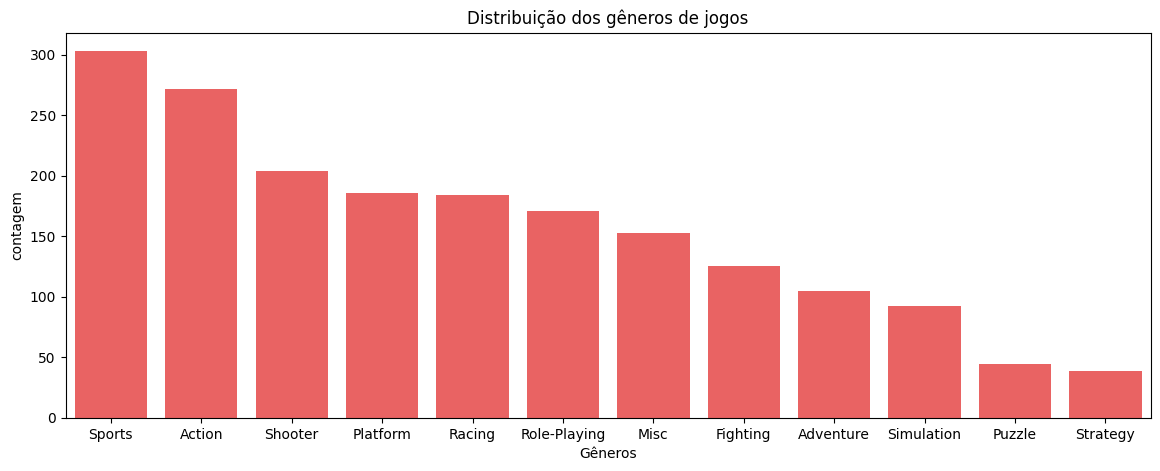

In [ ]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x='Genre',data=df, order=df['Genre'].value_counts().index, color='#ff4d4d')
plt.title('Distribuição dos gêneros de jogos')
plt.xlabel('Gêneros')
plt.ylabel('contagem')

O gráfico de barras mostra os genêros que mais aparecem nos mais vendidos em ordem decrescente.

In [ ]:
total_por_genero = df.groupby('Genre')['Global'].sum().reset_index()
print(total_por_genero.sort_values('Global', ascending=False))


           Genre  Global
10        Sports  691.21
0         Action  634.13
4       Platform  593.28
8        Shooter  553.58
7   Role-Playing  494.04
6         Racing  448.74
3           Misc  417.15
2       Fighting  246.00
1      Adventure  230.11
9     Simulation  205.14
5         Puzzle  108.65
11      Strategy   73.97


# Hipotese 2

# Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
df[['Global', 'Review']].describe()

,Global,Review
count,1878.000000,1878.000000
mean,2.500532,79.038243
std,3.587041,10.652957
min,0.830000,30.500000
25%,1.110000,74.000000
50%,1.530000,81.095000
75%,2.547500,86.265000
max,81.120000,97.000000




---



Analisaremos agora a média de reviews por ano para descobrir o ano com as melhores notas


In [ ]:
# média dos atributos numéricos do dataset
df[['Global', 'Review']].describe().loc['mean']

,mean
Global,2.500532
Review,79.038243


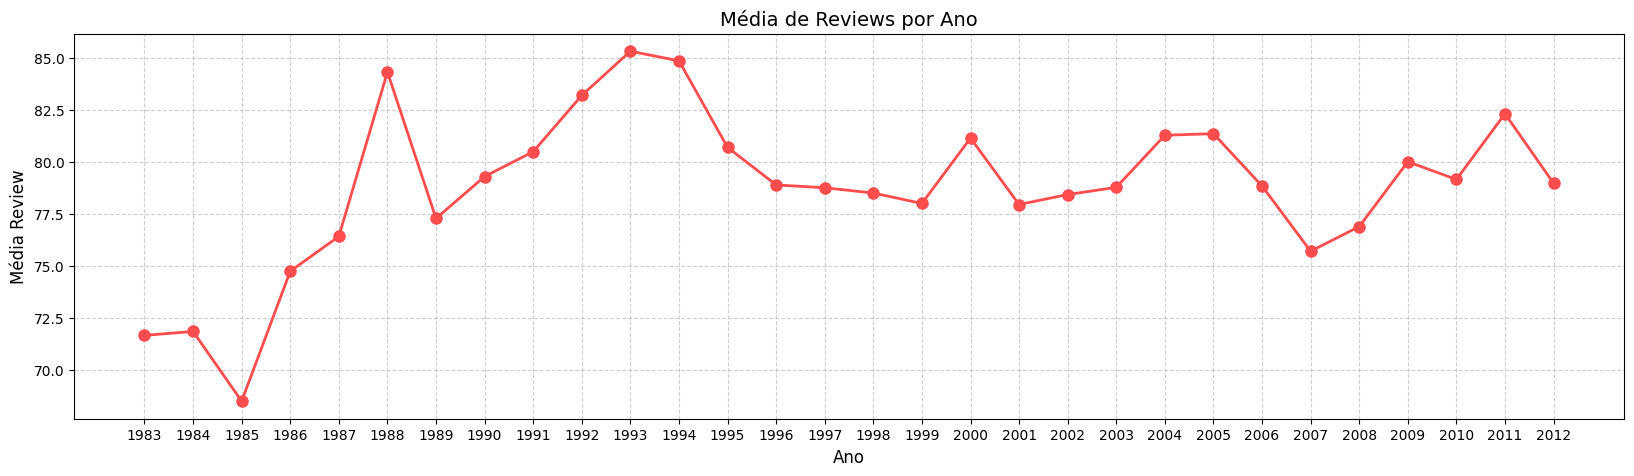

In [ ]:
medias = df[['Year', 'Global', 'Review']].groupby('Year').mean()

medias_review = df.groupby('Year')['Review'].mean().reset_index()

# Gráfico de Linhas
plt.figure(figsize=(20, 5))
plt.plot(
    medias_review['Year'],
    medias_review['Review'],
    marker='o',
    color='#ff4d4d',
    linestyle='-',
    linewidth=2,
    markersize=8
)

plt.title('Média de Reviews por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média Review', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(medias_review['Year'])  # Mostrar todos os anos no eixo X
plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

KeyError: 'sepal length (cm)'

<Figure size 800x600 with 0 Axes>

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('Rank').describe()

### *petal length* por Espécie


In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()

In [ ]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

KeyError: "['species'] not found in axis"

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


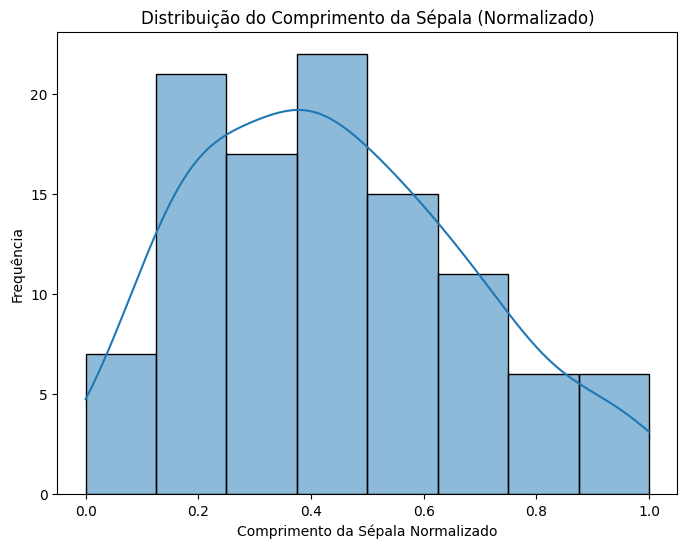

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


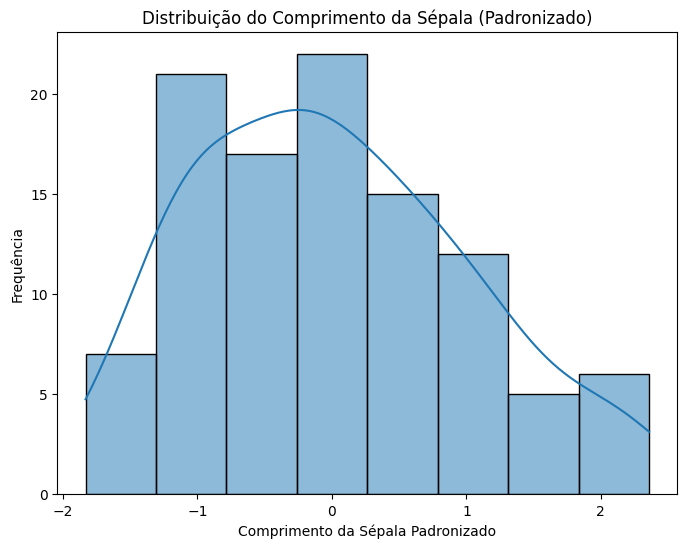

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.